# EXPLORATORY DATA ANALYSIS

# About Dataset And Objectives Of EDA
So here i am intrested to determine which factors keep employees at company and which prompt others to leave.
I need to know what factors I can change to prevent the loss of good people. 

I have data about past and current employees in a spreadsheet . It has various data points on employees, but I’m most interested in whether they’re still with company or whether they’ve gone to work somewhere else. And I want to understand how this relates to workforce attrition.

In [206]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
data = pd.read_csv("C:\\Users\\ASHRAF\\Downloads\\archive (10)\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [208]:
data.shape

(1470, 35)

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [210]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [211]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [212]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# DISTRIBUTION OF EMPLOYEE ATTRITION IN THE COMPANY

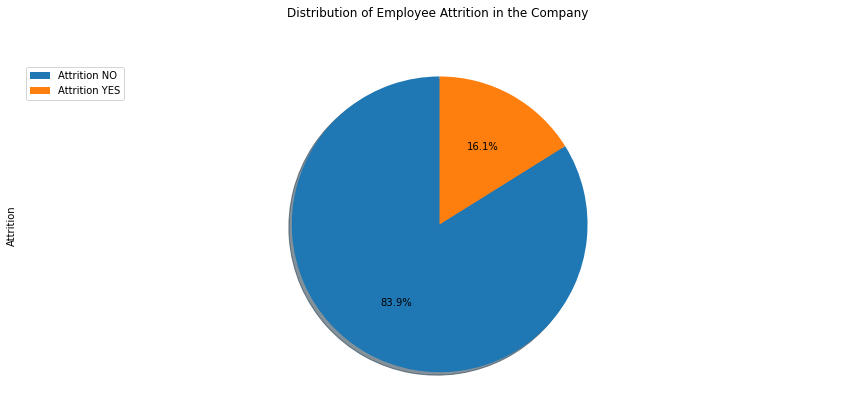

In [213]:
labels = 'Attrition NO','Attrition YES'
data['Attrition'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Employee Attrition in the Company ', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper left') 
 # show plot
plt.show()

From the Pie Chart, we can infer that out of 1470 employees, 16% of the employees left their job due to some reasons whereas other 84% of the employees preferred to continue their job at the company

# ANALYSIS OF THE FEATURE NAMES

In [214]:
# Drop useless features - StandardHours,EmployeeCount,Over18,EmployeeNumber,StockOptionLevel
data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'],inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,6,3,3,2,2,2,2


In [215]:
data.shape

(1470, 30)

# Analysis of the Rating Features

In [216]:
#1.JobSatisfaction

In [217]:
data['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

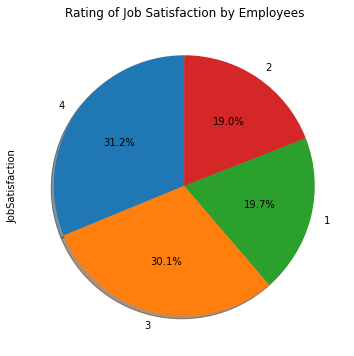

In [218]:
data['JobSatisfaction'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True) 
plt.title ('Rating of Job Satisfaction by Employees')

plt.show()

In [219]:
#2.EnvironmentSatisfaction

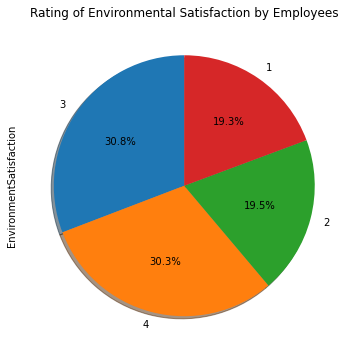

In [220]:
data['EnvironmentSatisfaction'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            ) 
plt.title('Rating of Environmental Satisfaction by Employees')
plt.show()

In [221]:
#3.RelationshipSatisfaction

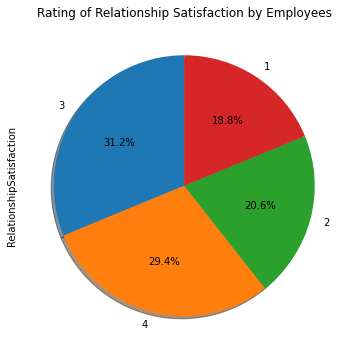

In [222]:
data['RelationshipSatisfaction'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True)
plt.title('Rating of Relationship Satisfaction by Employees')
plt.show()


In [223]:
# 4.JobInvolvement

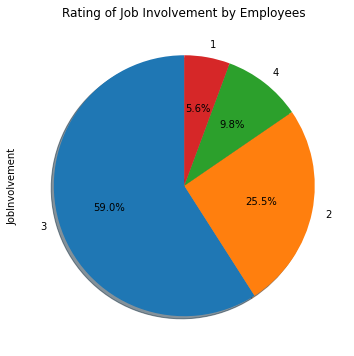

In [224]:
data['JobInvolvement'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True) 
plt.title('Rating of Job Involvement by Employees')
plt.show()

In [225]:
# 5.WorkLifeBalance

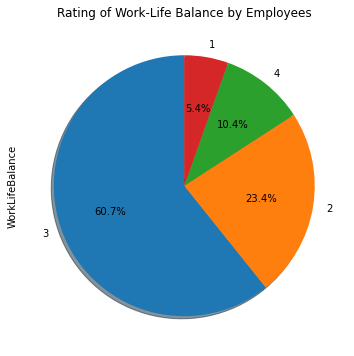

In [226]:
data['WorkLifeBalance'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True)
plt.title ('Rating of Work-Life Balance by Employees')

plt.show()

In [229]:
# 6.PerformanceRating

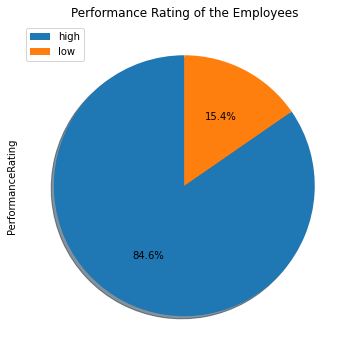

In [230]:
data['PerformanceRating'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,labels=None) 
plt.title('Performance Rating of the Employees')
plt.legend(labels={'high':4,'low':3})
plt.show()

# Analysis of Business Travel Feature

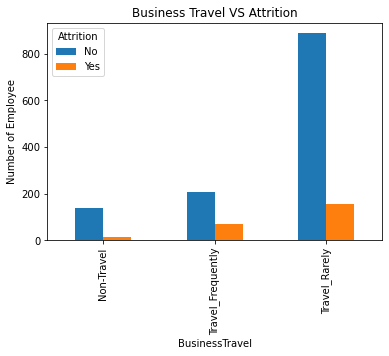

In [231]:
props = data.groupby("BusinessTravel")['Attrition'].value_counts().unstack()

props.plot(kind='bar')

plt.title('Business Travel VS Attrition')
plt.ylabel('Number of Employee')
plt.show()

# Analysis of Work Experience

In [232]:
we = data[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
we.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,Yes
1,10,7,1,7,10,No
2,0,0,0,0,7,Yes
3,8,7,3,0,8,No
4,2,2,2,2,6,No


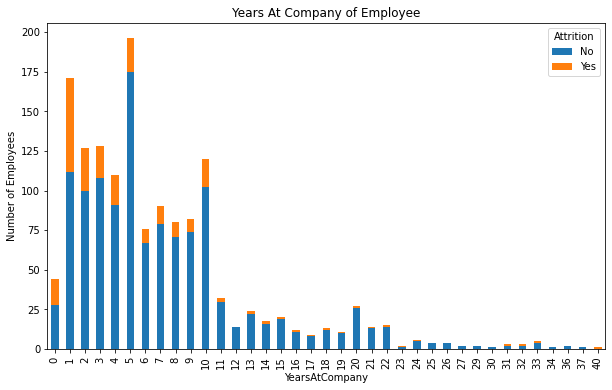

In [233]:
yac = data.groupby("YearsAtCompany")['Attrition'].value_counts().unstack()

yac.plot(kind='bar', stacked=True,figsize=(10,6))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()

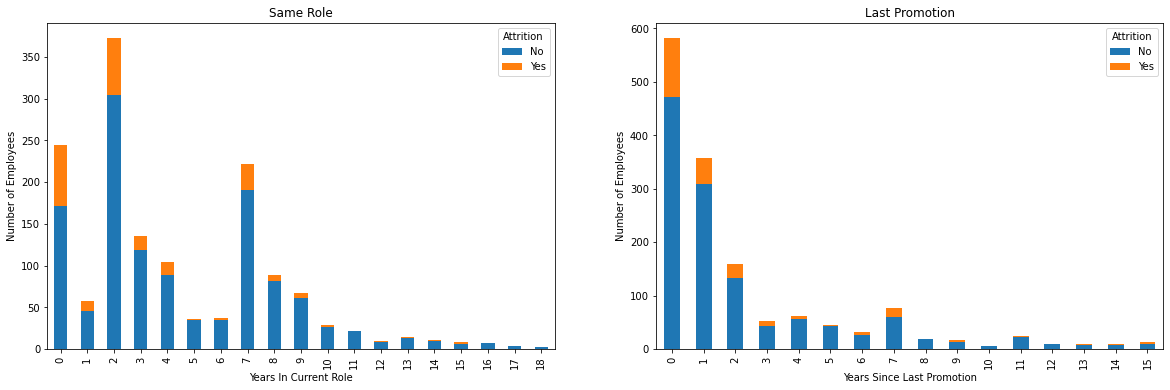

In [234]:
ycr = data.groupby("YearsInCurrentRole")['Attrition'].value_counts().unstack()
ysp = data.groupby("YearsSinceLastPromotion")['Attrition'].value_counts().unstack()


fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot). 

# Subplot 1: Box plot
ycr.plot(kind='bar', stacked=True,figsize=(20,6), ax=ax0) # add to subplot 1
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')

# Subplot 2: Line plot
ysp.plot(kind='bar', stacked=True,figsize=(20,6), ax=ax1) # add to subplot 2
ax1.set_title ('Last Promotion')
ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Years Since Last Promotion')

plt.show()

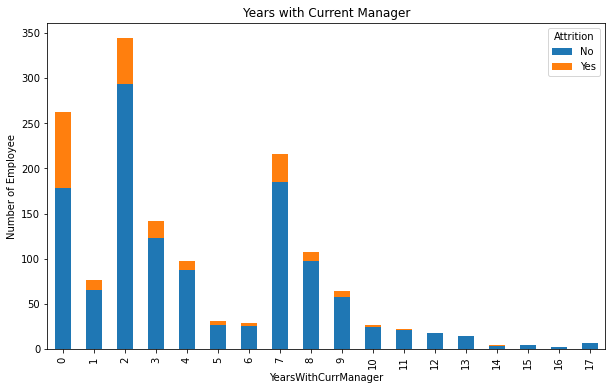

In [235]:
ycm = data.groupby("YearsWithCurrManager")['Attrition'].value_counts().unstack()

ycm.plot(kind='bar', stacked=True,figsize=(10,6))

plt.title('Years with Current Manager')
plt.ylabel('Number of Employee')
plt.show()

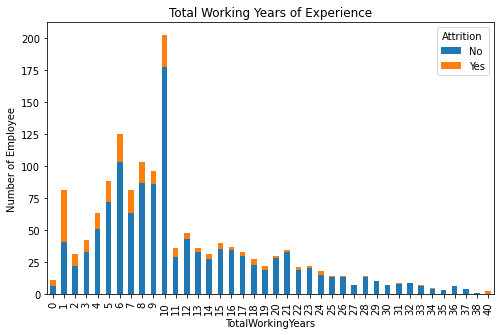

In [236]:
twy = data.groupby("TotalWorkingYears")['Attrition'].value_counts().unstack()

twy.plot(kind='bar', stacked=True,figsize=(8,5))

plt.title('Total Working Years of Experience')
plt.ylabel('Number of Employee')
plt.show()

# Analysis of Monthly Income

In [237]:
mi = data[data['Attrition']=='Yes']['MonthlyIncome']
mi = mi.reset_index()
mi.drop(['index'], axis=1, inplace=True)


mn = data[data['Attrition']=='No']['MonthlyIncome']
mn = mn.reset_index()
mn.drop(['index'], axis=1, inplace=True)

mi['mn'] = mn
mi.rename(columns={'MonthlyIncome':'Yes', 'mn':'No'}, inplace=True)
mi.head()

,Yes,No
0,5993,5130
1,2090,2909
2,2028,3468
3,3407,3068
4,2960,2670


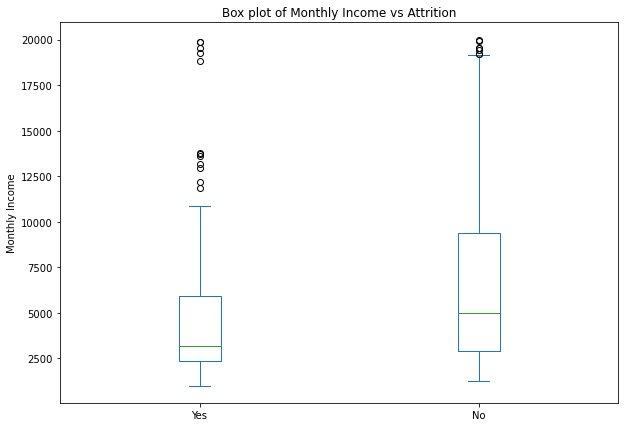

In [238]:
mi.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')

plt.show()

Employees who left their jobs tend to have low average monthly income than those who continued their job in the company

# Over Time Employee Analysis

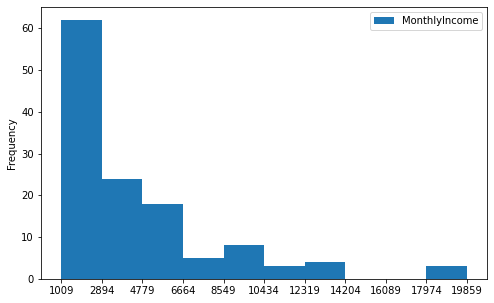

In [239]:
dot = data[['OverTime', 'MonthlyIncome', 'Attrition']]
df1 = dot[(data['OverTime']=='Yes') & (data['Attrition']=='Yes')]
df1 = df1.sort_values(by = 'MonthlyIncome', ascending=False) #sorting to get the top values
count, bin_edges = np.histogram(df1['MonthlyIncome'])
oyay.plot(kind='hist', xticks=bin_edges,figsize=(8,5))
plt.show()

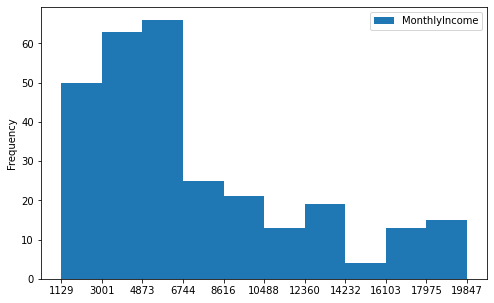

In [240]:
df2= dot[(data['OverTime']=='Yes') & (data['Attrition']=='No')]
count, bin_edges = np.histogram(df2['MonthlyIncome'])

df2.plot(kind='hist', xticks=bin_edges,figsize=(8,5))
plt.show()

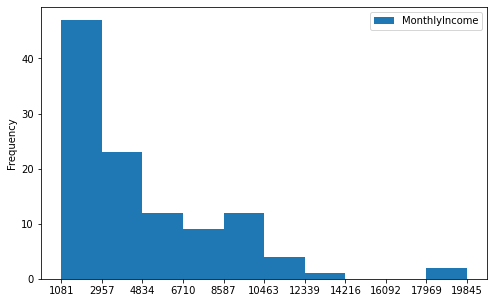

In [241]:
df3 = dot[(data['OverTime']=='No') & (data['Attrition']=='Yes')]
count, bin_edges = np.histogram(df3['MonthlyIncome'])

df3.plot(kind='hist', xticks=bin_edges,figsize=(8,5))
plt.show()

<AxesSubplot:ylabel='Frequency'>

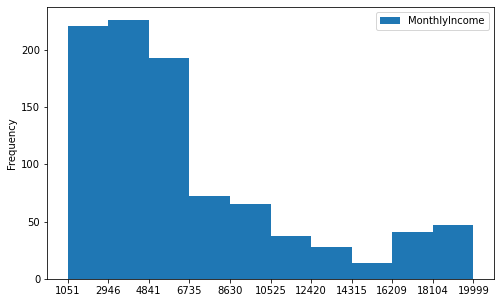

In [242]:
df4 = dot[(data['OverTime']=='No') & (data['Attrition']=='No')]
count, bin_edges = np.histogram(df4['MonthlyIncome'])

df4.plot(kind='hist', xticks=bin_edges,figsize=(8,5))

# Analysis on Department

In [243]:
dpt = data[['Department','Attrition']]
dpt.head()

,Department,Attrition
0,Sales,Yes
1,Research & Development,No
2,Research & Development,Yes
3,Research & Development,No
4,Research & Development,No


In [244]:
dpt['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

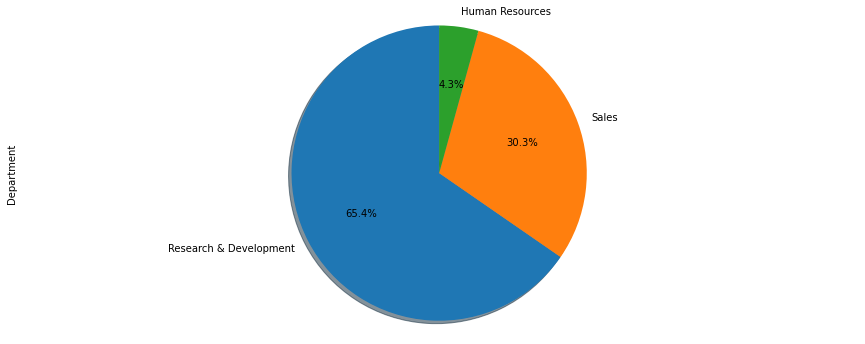

In [245]:
dpt['Department'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True)   
plt.axis('equal') 
plt.show()

In [246]:
dpm = data.groupby("Department")['Attrition'].value_counts().unstack()
dpm = dpm.transpose()
dpm

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


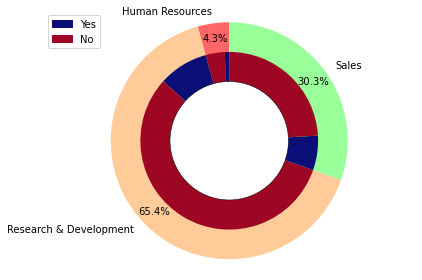

In [247]:
labels = ['Human Resources', 'Research & Development', 'Sales',]
sizes = [63, 961, 446]
colors = ['#ff6666', '#ffcc99', '#99ff99']

labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.tight_layout()
plt.show()

# Analysis Gender

In [248]:
gda = data[['Gender', 'DistanceFromHome', 'Attrition']]
gda.head()

,Gender,DistanceFromHome,Attrition
0,Female,1,Yes
1,Male,8,No
2,Male,2,Yes
3,Female,3,No
4,Male,2,No


In [249]:
gda['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

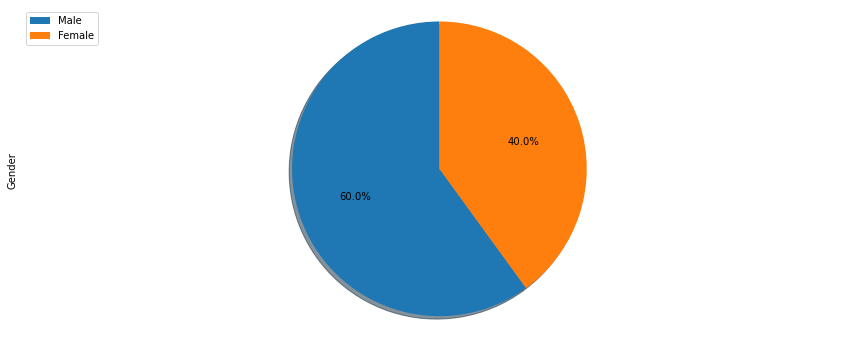

In [250]:
gda['Gender'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Male', 'Female'], loc='upper left') 

In [251]:
fma = gda.groupby("Gender")['Attrition'].value_counts(normalize=False).unstack()
fma = fma.transpose()
fma

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


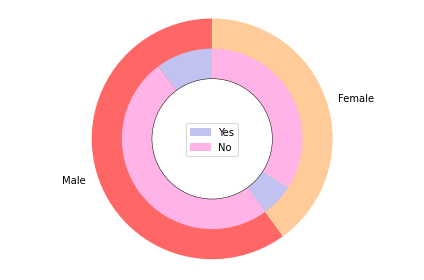

In [252]:
labels = ['Male', 'Female']
sizes = [882,588]
labels_attrition = ['Yes','No','Yes','No']
sizes_attrition = [150,732,87,501]
colors = ['#ff6666', '#ffcc99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()

# Analysis of Marital Status

In [253]:
ms = data[['MaritalStatus', 'Attrition']]
ms.head()

,MaritalStatus,Attrition
0,Single,Yes
1,Married,No
2,Single,Yes
3,Married,No
4,Married,No


In [254]:
ms['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

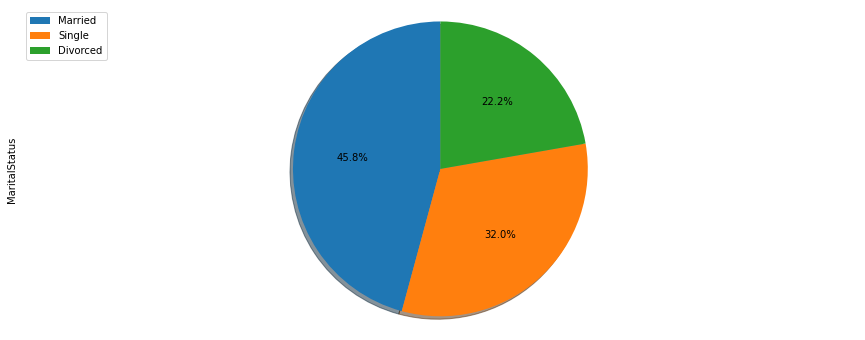

In [255]:
ms['MaritalStatus'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Married', 'Single', 'Divorced'], loc='upper left') 
plt.show()

In [256]:
msa = ms.groupby("MaritalStatus")['Attrition'].value_counts().unstack()
msa = msa.transpose()
msa

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


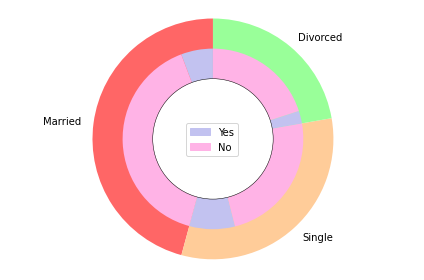

In [257]:
labels = ['Married', 'Single', 'Divorced']
sizes = [673, 470, 327]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [84,589,120,350,33,294]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
gre = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[gre, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()